# Problem loan prediction 2017 - Lending Club
## Testing kaggle model 2 (2007-2015)

https://www.kaggle.com/gagrawal/neural-net-with-keras

In [1]:
import os, sys, re
#import cPickle as pickle
from keras.models import Sequential
from keras.layers import Dense
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print (time.time())
dataset = pd.read_csv("../loan.csv", low_memory=False)

Using TensorFlow backend.


1511054328.402983


In [2]:
dataset = dataset.fillna(0) ## filling missing values with zeros

In [3]:
dataset['application_type'] = dataset['application_type'].astype('category').cat.codes
dataset['addr_state'] = dataset['addr_state'].astype('category').cat.codes
dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'])
dataset['earliest_cr_line'] = (dataset['earliest_cr_line']-dataset['earliest_cr_line'].min())/np.timedelta64(1,'D')
dataset['emp_length'] = dataset['emp_length'].astype('category').cat.codes
dataset['grade'] = dataset['grade'].astype('category').cat.codes
dataset['home_ownership'] = dataset['home_ownership'].astype('category').cat.codes
dataset['initial_list_status'] = dataset['initial_list_status'].astype('category').cat.codes
dataset['issue_d'] = pd.to_datetime(dataset['issue_d'])
dataset['issue_d'] = (dataset['issue_d']-dataset['issue_d'].min())/np.timedelta64(1,'D')
dataset['last_credit_pull_d'] = pd.to_datetime(dataset['last_credit_pull_d'])
dataset['last_credit_pull_d'] = (dataset['last_credit_pull_d']-dataset['last_credit_pull_d'].min())/np.timedelta64(1,'D')
dataset['last_pymnt_d'] = pd.to_datetime(dataset['last_pymnt_d'])
dataset['last_pymnt_d'] = (dataset['last_pymnt_d']-dataset['last_pymnt_d'].min())/np.timedelta64(1,'D')
dataset['loan_status'] = dataset['loan_status'].astype('category').cat.codes
dataset['next_pymnt_d'] = pd.to_datetime(dataset['next_pymnt_d'])
dataset['next_pymnt_d'] = (dataset['next_pymnt_d']-dataset['next_pymnt_d'].min())/np.timedelta64(1,'D')
dataset['purpose'] = dataset['purpose'].astype('category').cat.codes
dataset['pymnt_plan'] = dataset['pymnt_plan'].astype('category').cat.codes
dataset['sub_grade'] = dataset['sub_grade'].astype('category').cat.codes
dataset['term'] = dataset['term'].astype('category').cat.codes
dataset['verification_status'] = dataset['verification_status'].astype('category').cat.codes
dataset['verification_status_joint'] = dataset['verification_status_joint'].astype('category').cat.codes

In [4]:
non_numerics = [x for x in dataset.columns
if not (dataset[x].dtype == np.float64 or dataset[x].dtype == np.int8 or dataset[x].dtype == np.int64)]

In [5]:
dataset.shape

(887379, 74)

In [6]:
df = dataset
df = df.drop(non_numerics,1)

In [7]:
def LoanResult(status):
    if (status == 5) or (status == 1) or (status == 7):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

In [8]:
df.shape

(887379, 69)

In [9]:
train, test = train_test_split(df, test_size = 0.25)

##running complete data set will take a lot of time, hence reduced the data set
X_train = train.drop('loan_status',1).values[0:50000, :]
Y_train = train['loan_status'].values[0:50000]

X_test = test.drop('loan_status',1).values[0:1000, :]
Y_test = test['loan_status'].values[0:1000]

X_pred = test.drop('loan_status',1).values[1001:2000, :]

In [10]:
seed = 8 
np.random.seed(seed)

In [11]:
# Create the model 
model = Sequential()

# Define the three layered model
model.add(Dense(110, input_dim = 68, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(110, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

In [12]:
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
#

In [13]:
# Fit the model
model.fit(X_train, Y_train, epochs= 20, batch_size=200) # Changed the ephocs to 20

Epoch 1/20
50000/50000 [==============================] - 1s - loss: 1.4195 - acc: 0.9111     
Epoch 2/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 3/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 4/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 5/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 6/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 7/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 8/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 9/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 10/20
50000/50000 [==============================] - 1s - loss: 1.2572 - acc: 0.9211     
Epoch 11/20
50000/50000 [========================

In [14]:
performance = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], performance[1]*100))

  32/1000 [..............................] - ETA: 1sacc: 93.00%


In [15]:
# Predict using the trained model
prediction = model.predict(X_test)
prediction = prediction.round()
#rounded_predictions = [round(x) for x in prediction]
#print(rounded_predictions)

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(prediction, Y_test, labels=[0, 1])
cnf_matrix

array([[  0,   0],
       [ 70, 930]])

In [17]:
import matplotlib.pyplot as pl
%matplotlib inline
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pl.cm.Blues):
    """ FROM SCIKIT LEARN DOCUMENTATION
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45)
    pl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

Confusion matrix, without normalization


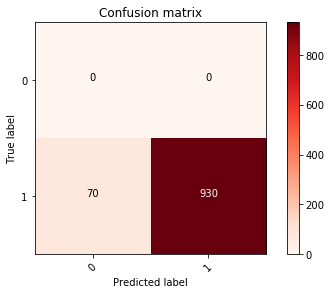

In [18]:
pl.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      cmap=pl.cm.Reds, normalize=False)

In [21]:
(930/(930+70))

0.93

In [22]:
performance

[1.1159670553207426, 0.93000000000000005]

In [2]:
Precission = 930/(930+70)
Recall = 930/(930+0)

print ("Precission {:.4f} and Recall {:.4f}, of the proposed ANN on the 2016 dataset".format(Precission, Recall))

Precission 0.9300 and Recall 1.0000, of the proposed ANN on the 2016 dataset
